GENERACIÓN DE DATASET -- MUÑECA 50HZ

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

Mounted at /content/drive


In [2]:
#CAMINAR
ruta_1 = '/content/drive/My Drive/Colab Notebooks/TESIS/MAICOL/MUÑECA/50HZ/Caminar_Mueñca_50HZ.csv'
df_1 = pd.read_csv(ruta_1)

#SENTARSE
ruta_2 = '/content/drive/My Drive/Colab Notebooks/TESIS/MAICOL/MUÑECA/50HZ/Sentarse_Muñeca_50HZ.csv'
df_2 = pd.read_csv(ruta_2)

#ESCALERAS
ruta_3 = '/content/drive/My Drive/Colab Notebooks/TESIS/MAICOL/MUÑECA/50HZ/Gradas_Muñeca_50HZ.csv'
df_3 = pd.read_csv(ruta_3)

#CAER
ruta_4 = '/content/drive/My Drive/Colab Notebooks/TESIS/MAICOL/MUÑECA/50HZ/Caerse_Muñeca_50HZ.csv'
df_4 = pd.read_csv(ruta_4)

In [3]:
#Agregando la etiqueta
df_1['Etiqueta'] = 'Caminar'
df_2['Etiqueta'] = 'Sentarse-Pararse'
df_3['Etiqueta'] = 'Escaleras'
df_4['Etiqueta'] = 'Caer'

UNIR DATASET PARA GENERAR DATASET FINAL


In [4]:
df_final = pd.concat([df_1, df_2,df_3, df_4], ignore_index=True)
df_final
df_final.to_csv('P1_Muñeca_50HZ.csv', index=False)


PRE-PROCESAMIENTO DEL DATASET


Verificación de nulos y de la columna timestamp

In [ ]:
import pandas as pd

# Asegúrate de que la columna 'timestamp' sea tipo datetime
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'])

# 1. Verificar si hay valores nulos
nulos = df_final.isnull().sum()
print("Valores nulos por columna:")
print(nulos)

# 2. Verificar si hay timestamps duplicados
duplicados = df_final['timestamp'].duplicated().sum()
print(f"\nNúmero de timestamps duplicados: {duplicados}")

if duplicados > 0:
    print("\nTimestamps duplicados:")
    print(df_final[df_final['timestamp'].duplicated(keep=False)])

# 3. Verificar si los timestamps están en orden ascendente
fuera_de_orden = not df_final['timestamp'].is_monotonic_increasing
print(f"\n¿Timestamps fuera de orden? {'Sí' if fuera_de_orden else 'No'}")

if fuera_de_orden:
    desordenados = df_final['timestamp'].shift(-1) < df_final['timestamp'] #Se mueve todos los datos de la columna timestamp 1 hacía arriba para comparar
    print("\nFilas donde el timestamp siguiente es anterior al actual:")
    print(df_final[desordenados])

    # Corregir el orden
    df_final = df_final.sort_values('timestamp').reset_index(drop=True) #reini
    print("\n Dataset ordenado por timestamp.")


Valores nulos por columna:
timestamp     0
ax            0
ay            0
az            0
gx            0
gy            0
gz            0
accel_freq    0
gyro_freq     0
Etiqueta      0
dtype: int64

Número de timestamps duplicados: 0

¿Timestamps fuera de orden? Sí

Filas donde el timestamp siguiente es anterior al actual:
                      timestamp        ax        ay        az       gx  \
1926 2025-05-20 17:08:39.894314  0.998704  4.728816  8.949157  0.30226   

            gy        gz  accel_freq  gyro_freq          Etiqueta  
1926  0.282686  0.186416       77.32      77.32  Sentarse-Pararse  

 Dataset ordenado por timestamp.


In [ ]:
#Cálculo de magnitud de la aceleración y ángulos de inclinación (pitch y roll)
# 3. Magnitud de aceleración
df_final['acc_mag'] = np.sqrt(df_final['ax']**2 + df_final['ay']**2 + df_final['az']**2)

# 4. Calcular pitch y roll (en grados) --> ángulos de inclinación
#df_final['pitch'] = np.arctan2(df_final['ax'], np.sqrt(df_final['ay']**2 + df_final['az']**2)) * 180/np.pi
#df_final['roll']  = np.arctan2(df_final['ay'], np.sqrt(df_final['ax']**2 + df_final['az']**2)) * 180/np.pi
df_final['pitch'] = np.arctan2(-df_final['ax'], np.sqrt(df_final['ay']**2 + df_final['az']**2)) * 180/np.pi
df_final['roll']  = np.arctan2(df_final['ay'], df_final['az']) * 180/np.pi

print(df_final)

                      timestamp        ax        ay        az        gx  \
0    2025-05-20 16:51:43.220118 -0.469591  2.946761  9.967302 -0.009188   
1    2025-05-20 16:51:43.244591 -0.469591  2.946761  9.967302 -0.009188   
2    2025-05-20 16:51:43.268739 -0.469591  2.946761  9.967302 -0.009188   
3    2025-05-20 16:51:43.287934 -0.469591  2.946761  9.967302 -0.009188   
4    2025-05-20 16:51:43.300198 -0.469591  2.946761  9.967302 -0.009188   
...                         ...       ...       ...       ...       ...   
4984 2025-05-20 17:24:13.667083  1.274477  3.766004  6.469893 -0.417438   
4985 2025-05-20 17:24:13.687151  1.274477  3.766004  6.469893 -0.417438   
4986 2025-05-20 17:24:13.710566  1.274477  3.766004  6.469893 -0.417438   
4987 2025-05-20 17:24:13.727235  1.274477  3.766004  6.469893 -0.417438   
4988 2025-05-20 17:24:13.756690  1.274477  3.766004  6.469893 -0.417438   

            gy        gz  accel_freq  gyro_freq Etiqueta    acc_mag     pitch  \
0     0.331021  0.

In [ ]:
df_final = df_final.drop(columns=['accel_freq', 'gyro_freq'], errors='ignore')
df_final

,timestamp,ax,ay,az,gx,gy,gz,Etiqueta,acc_mag,pitch,roll
0,2025-05-20 16:51:43.220118,-0.469591,2.946761,9.967302,-0.009188,0.331021,0.021305,Caminar,10.404376,2.586868,16.469934
1,2025-05-20 16:51:43.244591,-0.469591,2.946761,9.967302,-0.009188,0.331021,0.021305,Caminar,10.404376,2.586868,16.469934
2,2025-05-20 16:51:43.268739,-0.469591,2.946761,9.967302,-0.009188,0.331021,0.021305,Caminar,10.404376,2.586868,16.469934
3,2025-05-20 16:51:43.287934,-0.469591,2.946761,9.967302,-0.009188,0.331021,0.021305,Caminar,10.404376,2.586868,16.469934
4,2025-05-20 16:51:43.300198,-0.469591,2.946761,9.967302,-0.009188,0.331021,0.021305,Caminar,10.404376,2.586868,16.469934
...,...,...,...,...,...,...,...,...,...,...,...
4984,2025-05-20 17:24:13.667083,1.274477,3.766004,6.469893,-0.417438,-0.300795,0.050465,Caer,7.593853,-9.661681,30.202884
4985,2025-05-20 17:24:13.687151,1.274477,3.766004,6.469893,-0.417438,-0.300795,0.050465,Caer,7.593853,-9.661681,30.202884
4986,2025-05-20 17:24:13.710566,1.274477,3.766004,6.469893,-0.417438,-0.300795,0.050465,Caer,7.593853,-9.661681,30.202884
4987,2025-05-20 17:24:13.727235,1.274477,3.766004,6.469893,-0.417438,-0.300795,0.050465,Caer,7.593853,-9.661681,30.202884


ORGANIZAR POR VENTANAS DE TIEMPO

In [ ]:
window_size = 100  # 2 segundos * 20 Hz
step_size = 50    # 50% de solapamiento

ventanas = []
start = 0

while start + window_size <= len(df_final):
    df_ventana = df_final.iloc[start:start + window_size].copy()

  #Ventana vacía la salta
    if len(df_ventana) == 0:
        start += step_size
        continue

    #Obtener la etiqueta más frecuente de la ventana
    etiqueta_ventana = df_ventana['Etiqueta'].mode()[0]

    ventana_data = {
        'start_index': start,
        'end_index': start + window_size - 1,
        'n_muestras': len(df_ventana),
        'etiqueta': etiqueta_ventana
    }

    columnas_sensores = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'pitch', 'roll']

    # Agrega estadísticas por cada variable de sensor
    for col in columnas_sensores:
        ventana_data[f'{col}_mean'] = df_ventana[col].mean()
        ventana_data[f'{col}_std'] = df_ventana[col].std()
        ventana_data[f'{col}_min'] = df_ventana[col].min()
        ventana_data[f'{col}_max'] = df_ventana[col].max()
        ventana_data[f'{col}_range'] = df_ventana[col].max() - df_ventana[col].min()

    # Para acc_mag se calcula manualmente
    acc_mag = np.sqrt(df_ventana['ax']**2 + df_ventana['ay']**2 + df_ventana['az']**2)
    ventana_data['acc_mag_mean'] = acc_mag.mean()
    ventana_data['acc_mag_std'] = acc_mag.std()
    ventana_data['acc_mag_min'] = acc_mag.min()
    ventana_data['acc_mag_max'] = acc_mag.max()
    ventana_data['acc_mag_range'] = acc_mag.max() - acc_mag.min()

    ventanas.append(ventana_data)
    start += step_size


In [ ]:
df_caracteristicas = pd.DataFrame(ventanas)
print(df_caracteristicas)

    start_index  end_index  n_muestras etiqueta   ax_mean    ax_std  \
0             0         99         100  Caminar  1.262322  1.323741   
1            50        149         100  Caminar  1.642861  1.242139   
2           100        199         100  Caminar  3.384725  3.505450   
3           150        249         100  Caminar  5.743005  3.370576   
4           200        299         100  Caminar  6.511762  2.220863   
..          ...        ...         ...      ...       ...       ...   
93         4650       4749         100     Caer -3.495797  3.113972   
94         4700       4799         100     Caer -7.246508  4.097032   
95         4750       4849         100     Caer -9.887748  3.842891   
96         4800       4899         100     Caer -6.913218  5.373091   
97         4850       4949         100     Caer -1.441466  3.804276   

       ax_min     ax_max   ax_range   ay_mean  ...  roll_mean   roll_std  \
0   -0.512662   3.760919   4.273581  2.083299  ...  12.498134   6.17155

ANALISIS EXPLORATORIO DE DATOS

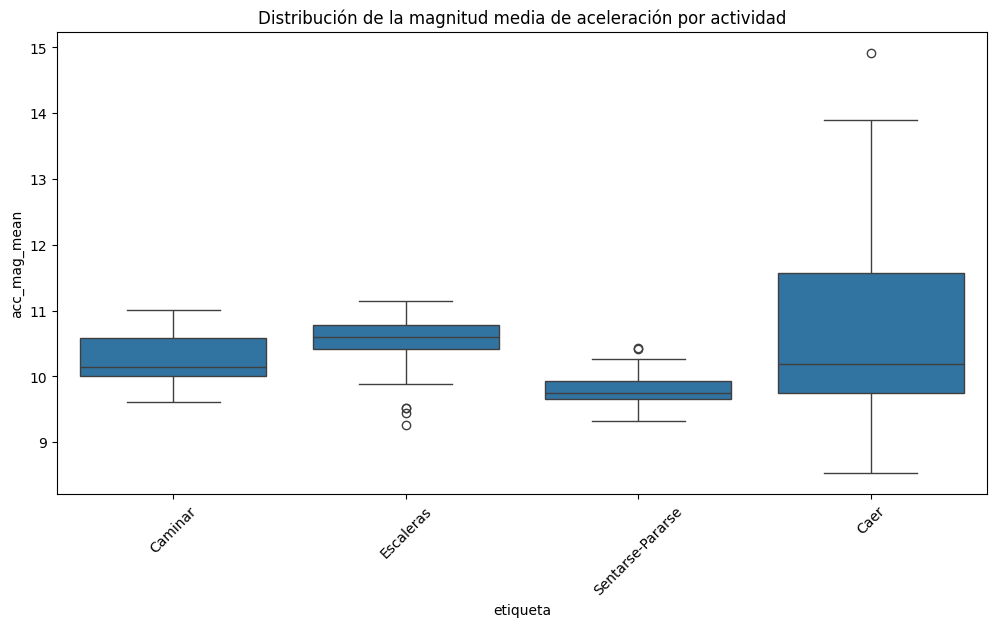

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='etiqueta', y='acc_mag_mean', data=df_caracteristicas)
plt.title("Distribución de la magnitud media de aceleración por actividad")
plt.xticks(rotation=45)
plt.show()

Box plot para cada variable

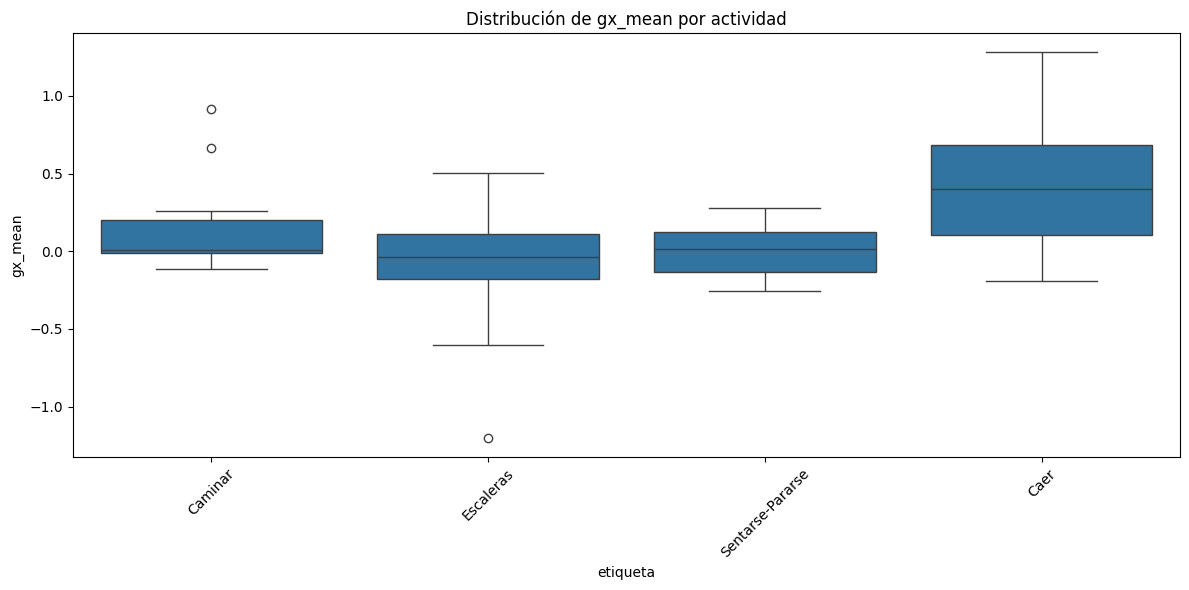

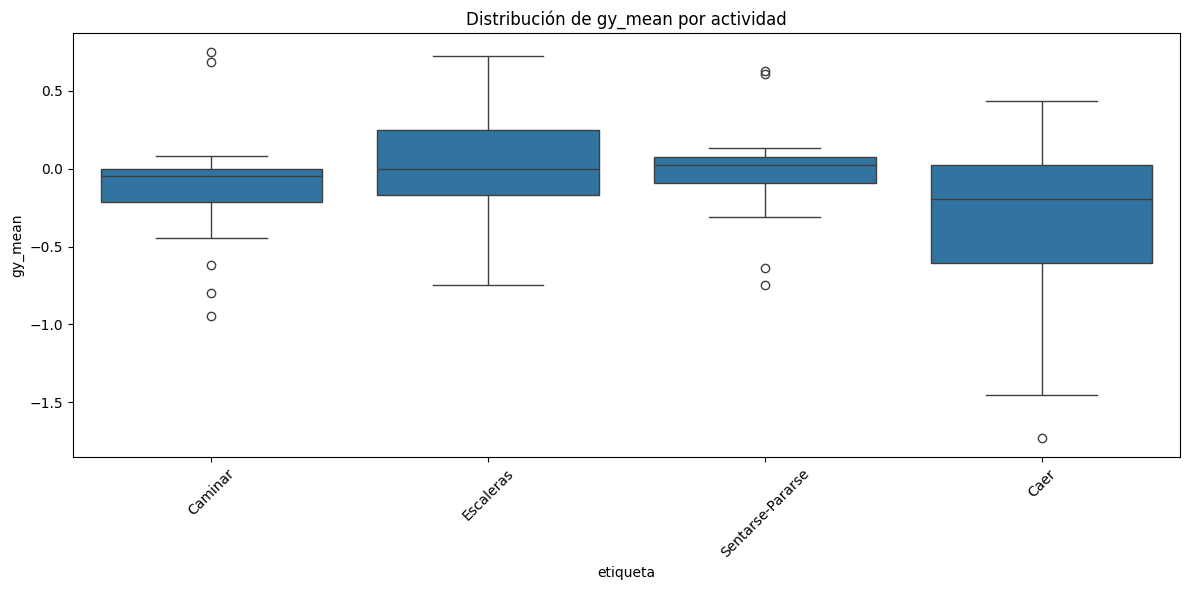

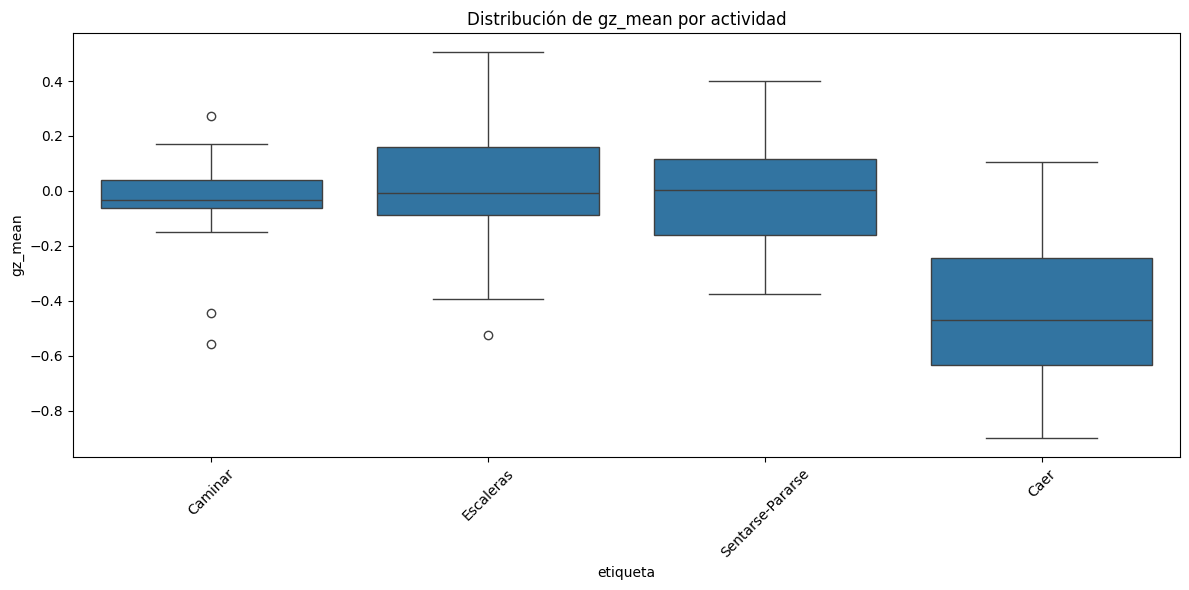

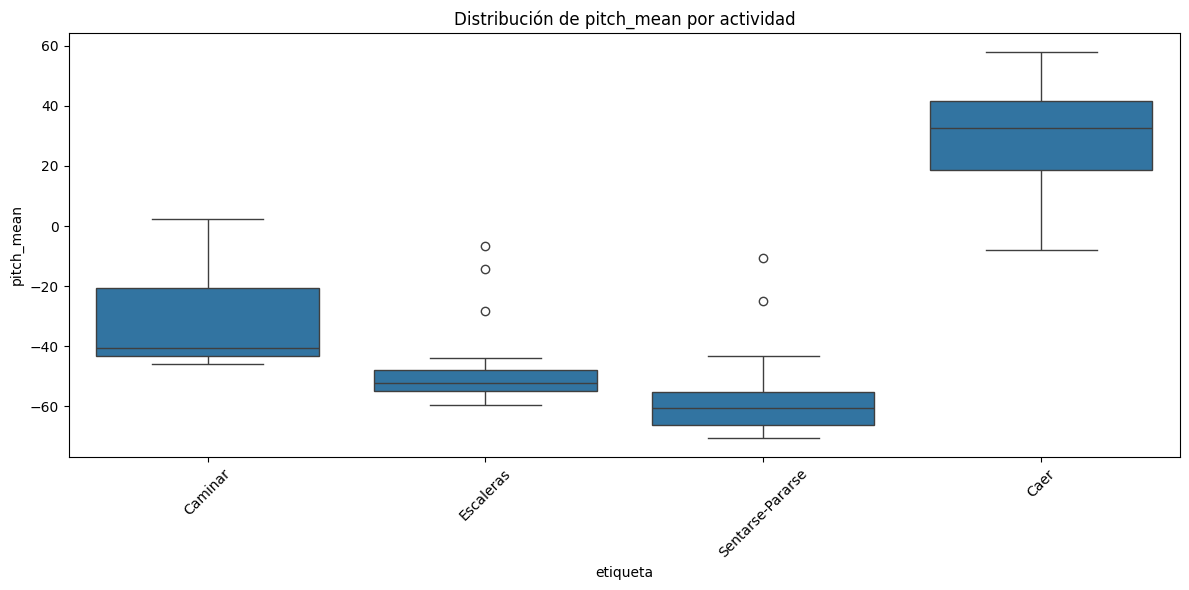

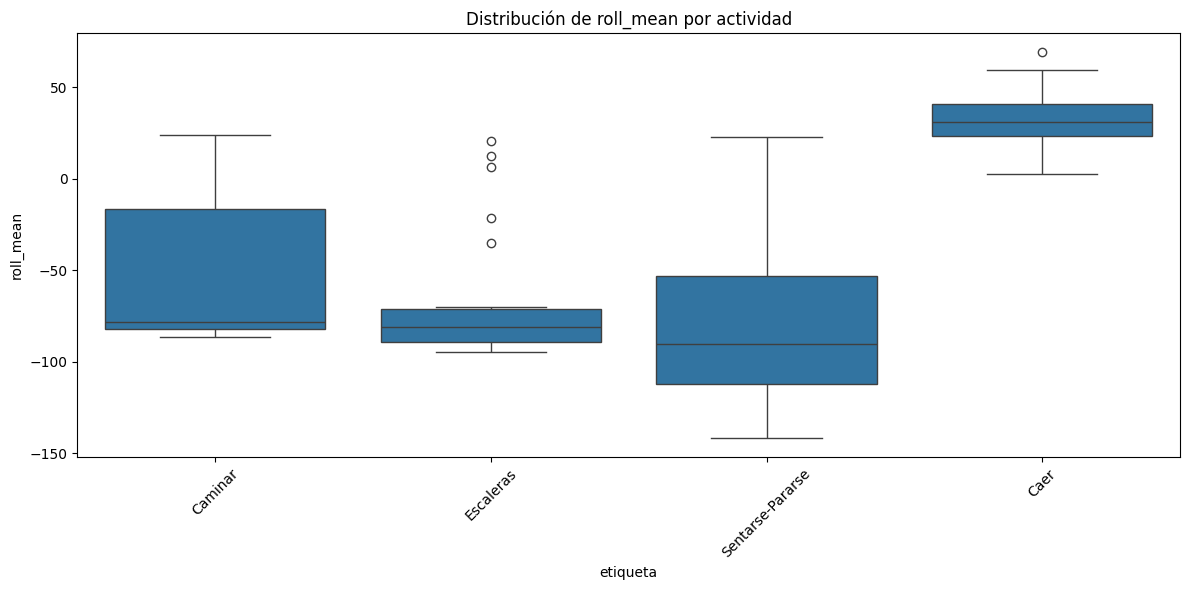

In [ ]:
# Lista de variables a gráficar
variables = ['gx_mean', 'gy_mean', 'gz_mean', 'pitch_mean', 'roll_mean']

for var in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='etiqueta', y=var, data=df_caracteristicas)
    plt.title(f"Distribución de {var} por actividad")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


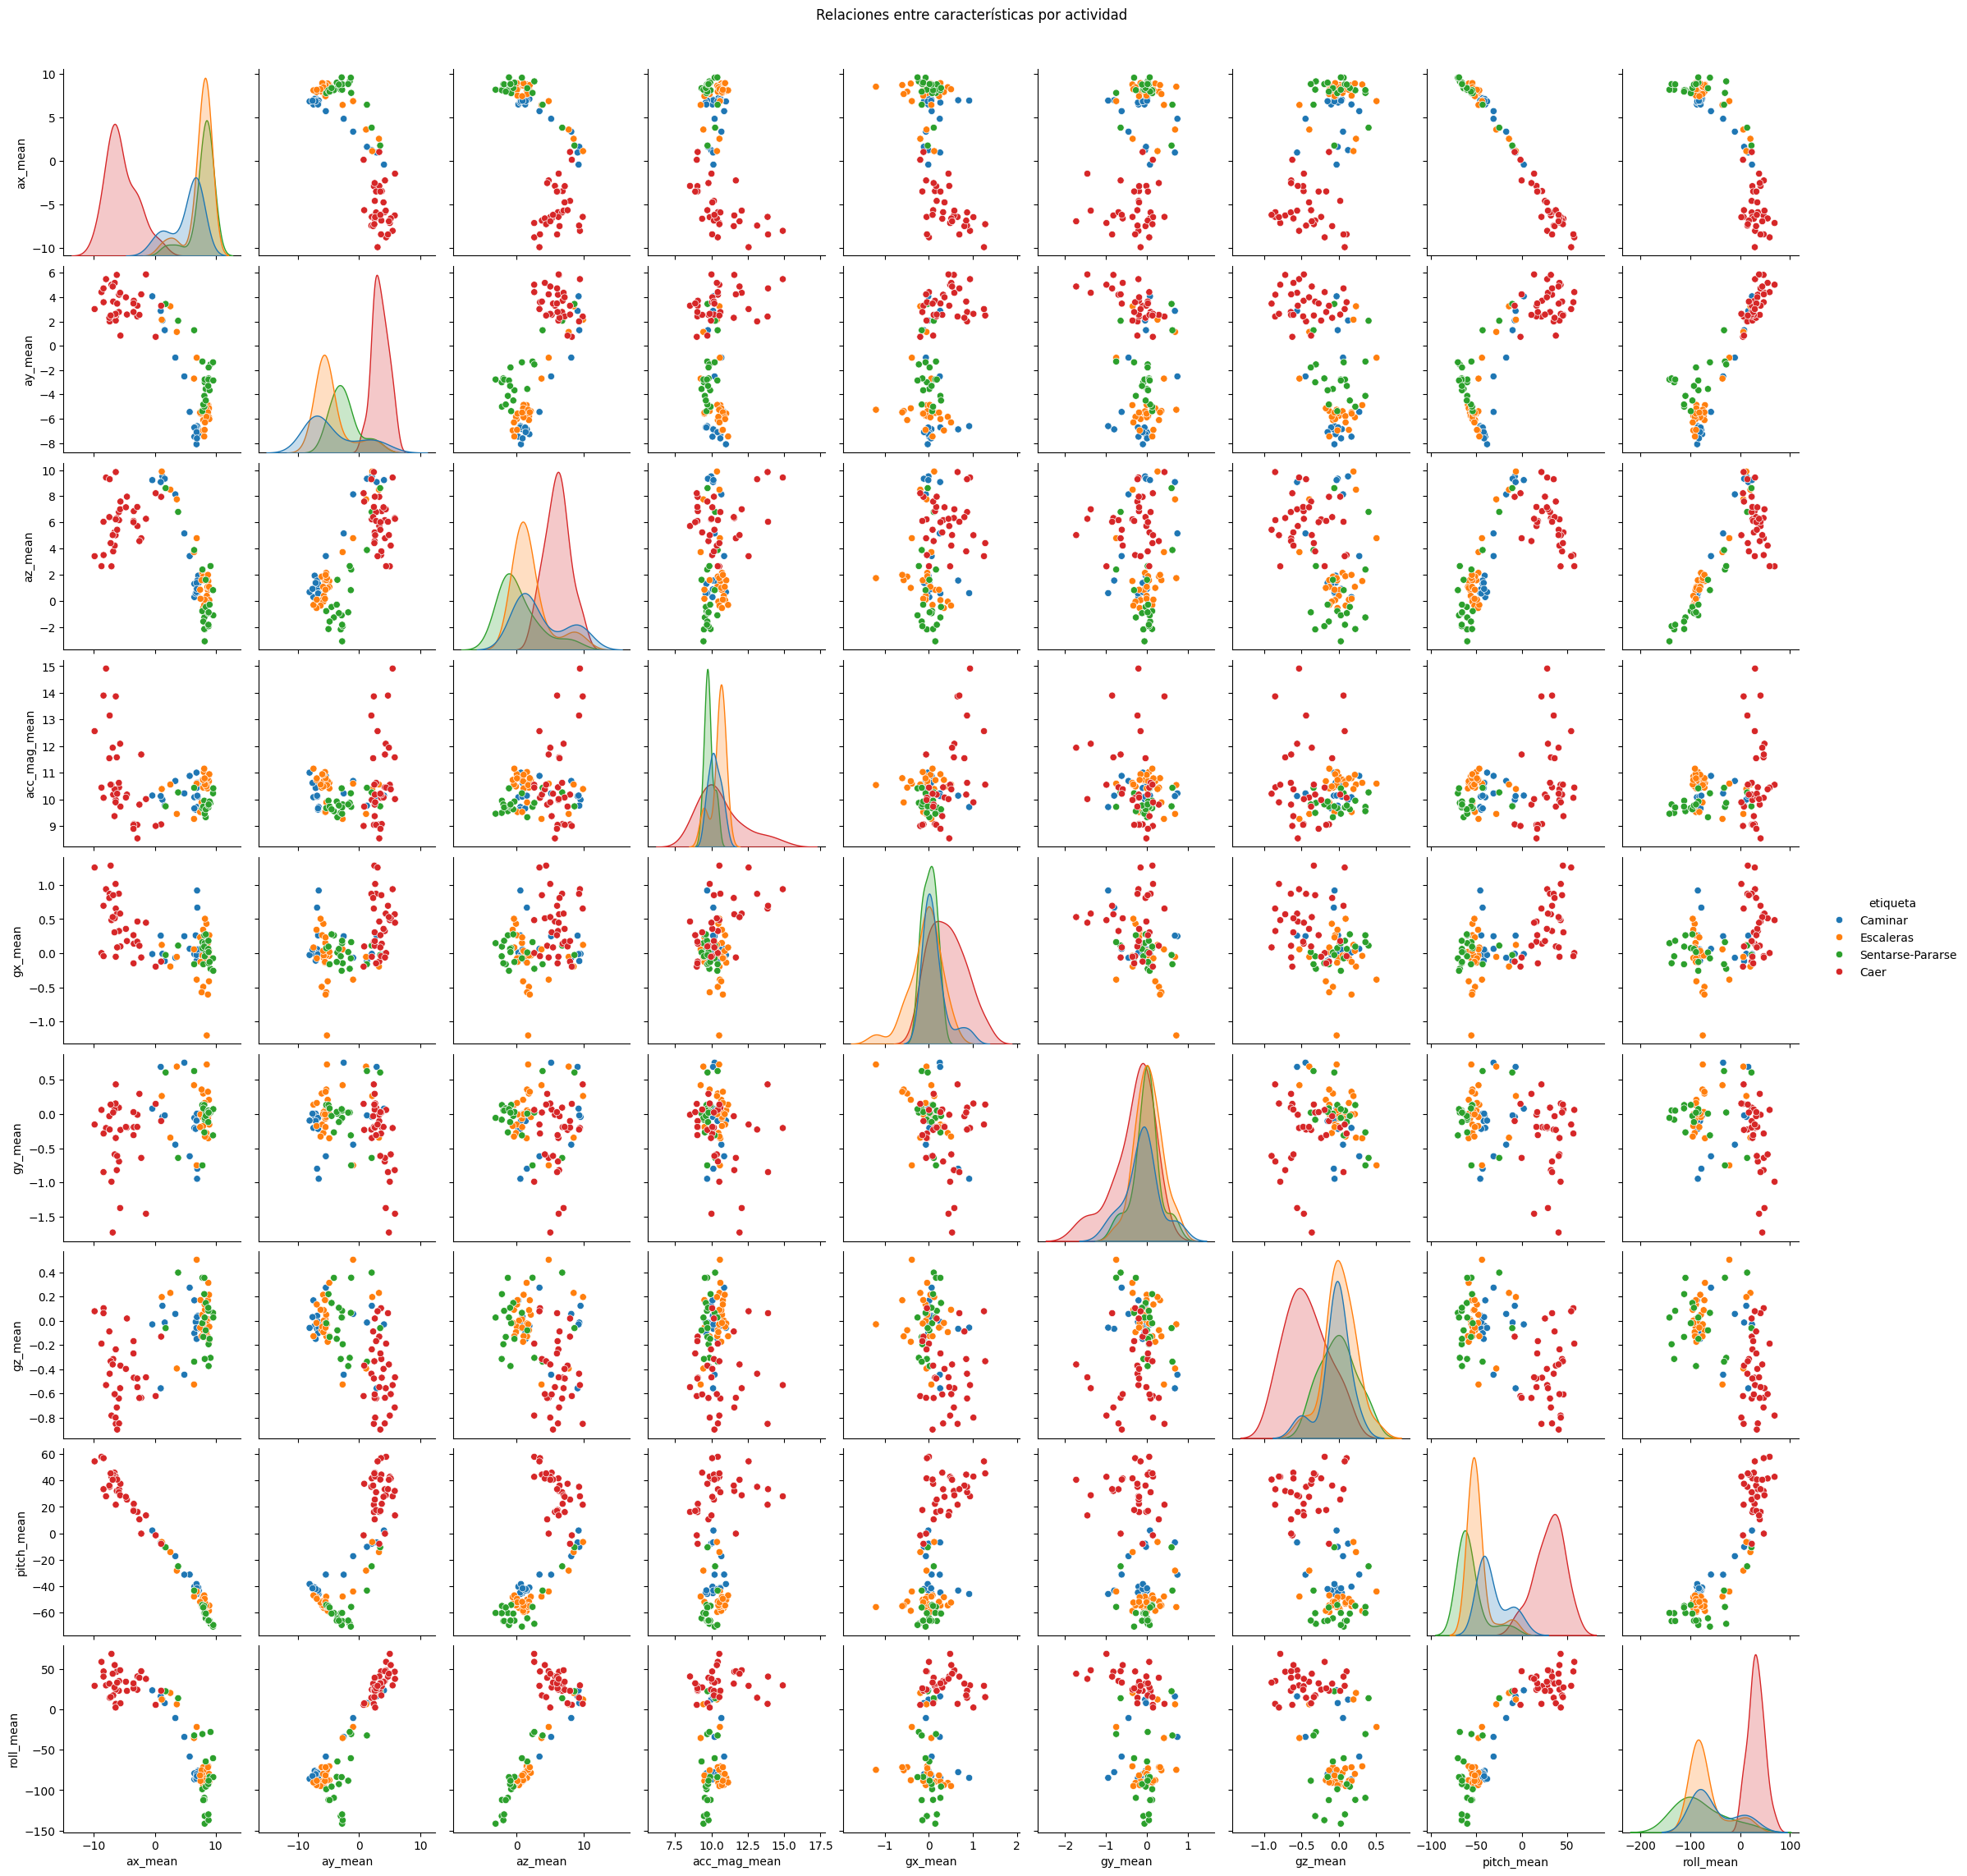

In [ ]:
sns.pairplot(df_caracteristicas[['ax_mean', 'ay_mean', 'az_mean', 'acc_mag_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'pitch_mean', 'roll_mean', 'etiqueta']], hue='etiqueta')
plt.suptitle("Relaciones entre características por actividad", y=1.02)
plt.savefig("pairplot.png", dpi=300)
plt.show()


Matriz de Correlación

Valores de 1 y -1 --> Alta correlación

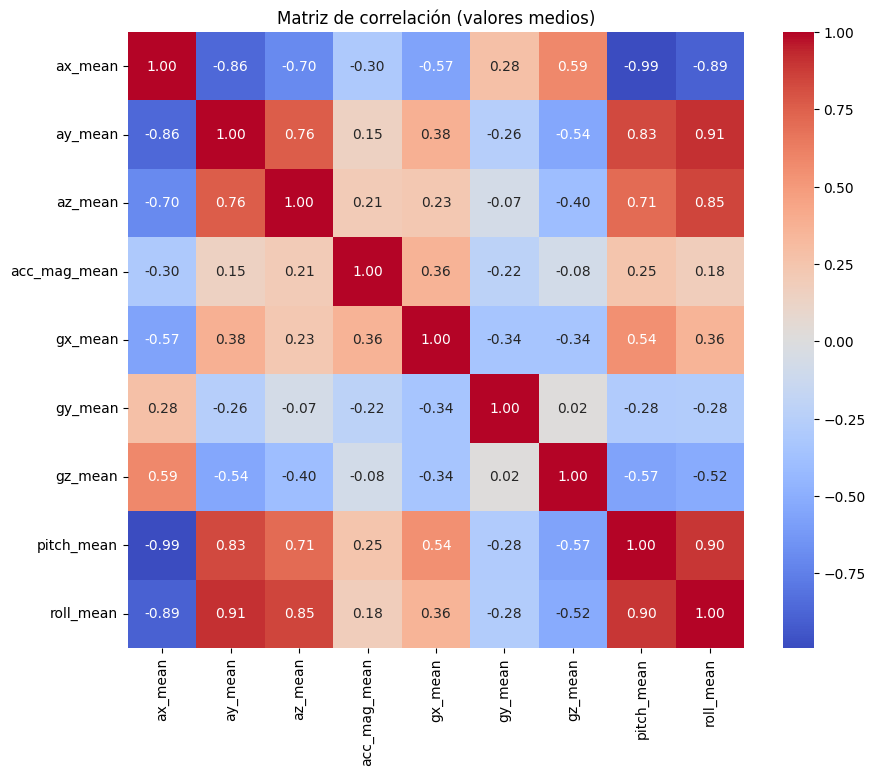

In [ ]:
cols_mean=['ax_mean', 'ay_mean', 'az_mean', 'acc_mag_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'pitch_mean', 'roll_mean']
data_mean = df_caracteristicas[cols_mean]
corr_matrix = data_mean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación (valores medios)')
plt.show()

ANALIZAR BALANCEO DE CLASES

etiqueta
Caer                34
Escaleras           26
Sentarse-Pararse    20
Caminar             18
Name: count, dtype: int64
etiqueta
Caer                34.693878
Escaleras           26.530612
Sentarse-Pararse    20.408163
Caminar             18.367347
Name: proportion, dtype: float64


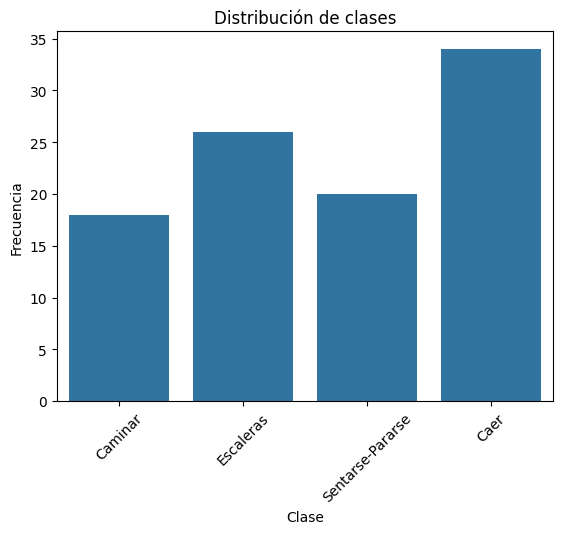

In [ ]:
# Conteo de clases
conteo = df_caracteristicas['etiqueta'].value_counts()
print(conteo)

# Porcentaje de cada clase
porcentaje = df_caracteristicas['etiqueta'].value_counts(normalize=True) * 100
print(porcentaje)

sns.countplot(x='etiqueta', data=df_caracteristicas)
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

APLICAR PCA --> Análisis de Componentes Principales

Técnica de reducción de dimensionalidad.
Transforma las variables en un nuevo conjunto (COMPONENTES PRINCIPLAES) --> Son combinaciones líneales de las variables originales y se ordenan según la cantidad de varianza

**OBJETIVO: es conservar la mayor cantidad de información con menos variables**

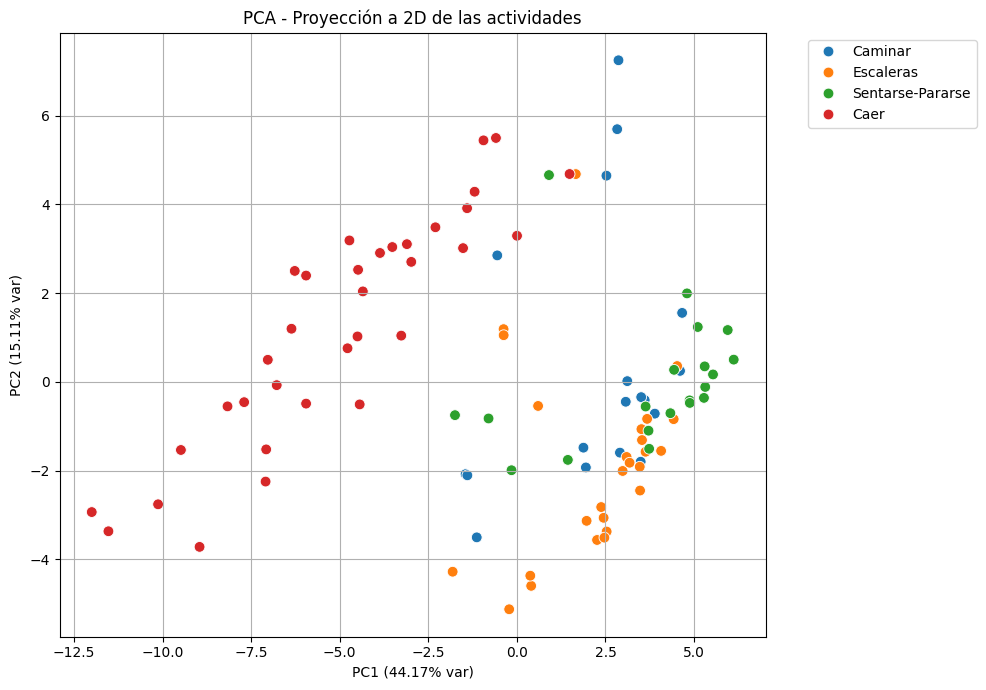

Varianza explicada por cada componente: [0.44168727 0.15114762]
Varianza total explicada por las dos primeras componentes: 0.5928348832682591


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Seleccionar features numéricos (excluyendo columnas no relevantes)
features = [col for col in df_caracteristicas.columns if col not in ['etiqueta', 'start_index', 'end_index', 'n_muestras']]

# 2. Escalamiento de datos (muy importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_caracteristicas[features])

# 3. Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Crear DataFrame con las componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['etiqueta'] = df_caracteristicas['etiqueta']

# 5. Visualización
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='etiqueta', palette='tab10', s=60)
plt.title('PCA - Proyección a 2D de las actividades')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% var)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% var)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada por las dos primeras componentes:", sum(pca.explained_variance_ratio_[:2]))



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Selección de features (excluye etiquetas y columnas no numéricas como fechas)
features = df_caracteristicas.select_dtypes(include=[np.number]).columns.difference(['n muestras'])  # Asegúrate de excluir cosas como 'start index', etc.
X = df_caracteristicas[features]
y = df_caracteristicas['etiqueta']  # Columna de etiquetas

# 2. Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA conservando el 95% de la varianza
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# 4. Información útil
print(f"Componentes seleccionados para explicar el 95% de la varianza: {pca.n_components_}")
print(f"Varianza explicada por cada componente:\n{pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.4f}")


Componentes seleccionados para explicar el 95% de la varianza: 13
Varianza explicada por cada componente:
[0.4410976  0.14875647 0.07329916 0.06520163 0.04789185 0.04012908
 0.03617162 0.0289487  0.02181723 0.01802189 0.01653464 0.01094193
 0.01079309]
Varianza total explicada: 0.9596


MODELADO

RF (RANDOM FOREST)

Modelado con el dataset completo y todas las features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Preparar datos
X = df_caracteristicas.drop(['start_index', 'end_index', 'n_muestras', 'etiqueta'], axis=1)
y = df_caracteristicas['etiqueta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Resultados
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

            Caer       1.00      0.86      0.92         7
         Caminar       0.57      1.00      0.73         4
       Escaleras       1.00      0.67      0.80         6
Sentarse-Pararse       1.00      1.00      1.00         3

        accuracy                           0.85        20
       macro avg       0.89      0.88      0.86        20
    weighted avg       0.91      0.85      0.86        20



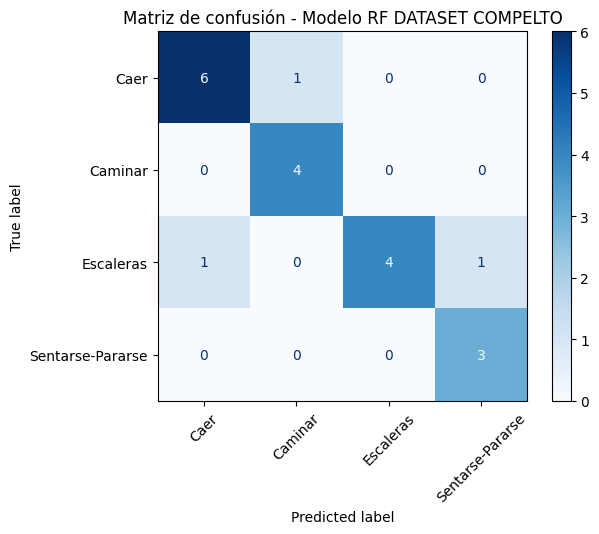

In [ ]:
#MAYTRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponiendo que ya hiciste las predicciones
# y_test_modelo es el real, y_pred_modelo es lo que predijo tu modelo
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Mostrar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de confusión - Modelo RF DATASET COMPELTO")
plt.show()


Modelado de RF con PCA


In [ ]:
X = pca_df.drop(columns='etiqueta')
y = pca_df['etiqueta']

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf_2 = RandomForestClassifier(random_state=42)
clf_2.fit(X_train_PCA, y_train_PCA)

y_pred_PCA = clf_2.predict(X_test_PCA)

print("Reporte de clasificación:")
print(classification_report(y_test_PCA, y_pred_PCA))

print("Matriz de confusión:")
print(confusion_matrix(y_test_PCA, y_pred_PCA))


Reporte de clasificación:
                  precision    recall  f1-score   support

            Caer       1.00      1.00      1.00         7
         Caminar       1.00      0.25      0.40         4
       Escaleras       0.56      1.00      0.71         5
Sentarse-Pararse       0.67      0.50      0.57         4

        accuracy                           0.75        20
       macro avg       0.81      0.69      0.67        20
    weighted avg       0.82      0.75      0.72        20

Matriz de confusión:
[[7 0 0 0]
 [0 1 2 1]
 [0 0 5 0]
 [0 0 2 2]]


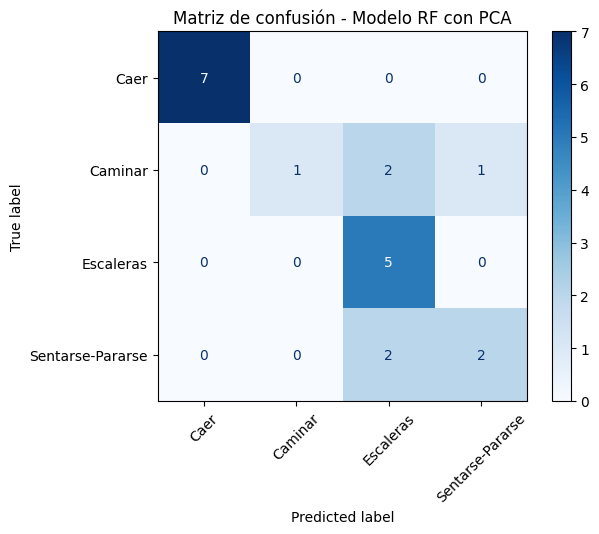

In [ ]:
#MAYTRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponiendo que ya hiciste las predicciones
# y_test_modelo es el real, y_pred_modelo es lo que predijo tu modelo
cm = confusion_matrix(y_test_PCA, y_pred_PCA, labels=clf_2.classes_)

# Mostrar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de confusión - Modelo RF con PCA")  # Reemplaza con RF completo, SVM con PCA, etc.
plt.show()


SVM

Busqueda de hiperparametros para SVM y Modelado con Dataset Completo

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define el pipeline con escalado y modelo SVM
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Definir la grilla de búsqueda
param_grid = {
    'svm__kernel': ['rbf', 'linear', 'poly'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.001],  # para rbf y poly
    'svm__degree': [2, 3, 4]  # solo se usa si kernel='poly'
}

# Usa tu conjunto de datos preferido
X = df_caracteristicas.drop(['start_index', 'end_index', 'n_muestras', 'etiqueta'], axis=1)
y = df_caracteristicas['etiqueta']

# División
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearch
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(X_train_2, y_train_2)

# Resultados
print("Mejores parámetros encontrados:")
print(grid.best_params_)

print("\nPrecisión en el conjunto de prueba:")
from sklearn.metrics import classification_report
y_pred_2 = grid.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores parámetros encontrados:
{'svm__C': 100, 'svm__degree': 2, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

Precisión en el conjunto de prueba:
                  precision    recall  f1-score   support

            Caer       1.00      1.00      1.00         7
         Caminar       1.00      1.00      1.00         4
       Escaleras       1.00      0.83      0.91         6
Sentarse-Pararse       0.75      1.00      0.86         3

        accuracy                           0.95        20
       macro avg       0.94      0.96      0.94        20
    weighted avg       0.96      0.95      0.95        20



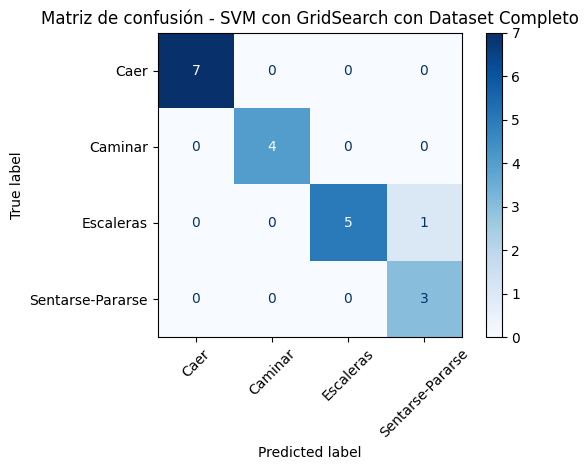

In [ ]:
#MATRIZ DE CONSUION

# Calcular matriz de confusión
cm = confusion_matrix(y_test_2, y_pred_2, labels=grid.classes_)

# Mostrar matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de confusión - SVM con GridSearch con Dataset Completo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Busqueda de Hiperparametros y Modelo SVM con PCA

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

# 1. Preparamos los datos
X = df_caracteristicas.drop(['start_index', 'end_index', 'n_muestras', 'etiqueta'], axis=1)
y = df_caracteristicas['etiqueta']

# 2. División de datos
X_train_PCA_2, X_test_PCA_2, y_train_PCA_2, y_test_PCA_2 = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Pipeline: Escalado → PCA → SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('svm', SVC())
])

# 4. Definimos la malla de hiperparámetros
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.01, 0.1, 1],
    'svm__degree': [2, 3]  # solo aplica a 'poly', pero GridSearch lo manejará
}

# 5. GridSearchCV
grid_search_pca = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search_pca.fit(X_train_PCA_2, y_train_PCA_2)

# 6. Resultados
print("Mejores parámetros encontrados:")
print(grid_search_pca.best_params_)

# 7. Evaluación final
y_pred_PCA_2 = grid_search_pca.predict(X_test)
print("\nReporte de clasificación con PCA (95% varianza):")
print(classification_report(y_test_PCA_2, y_pred_PCA_2))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros encontrados:
{'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

Reporte de clasificación con PCA (95% varianza):
                  precision    recall  f1-score   support

            Caer       0.86      0.86      0.86         7
         Caminar       0.80      1.00      0.89         4
       Escaleras       1.00      0.67      0.80         6
Sentarse-Pararse       0.75      1.00      0.86         3

        accuracy                           0.85        20
       macro avg       0.85      0.88      0.85        20
    weighted avg       0.87      0.85      0.85        20



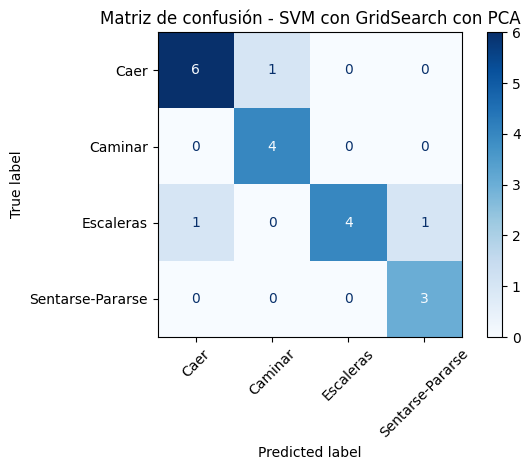

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test_PCA_2, y_pred_PCA_2, labels=grid.classes_)

# Mostrar matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de confusión - SVM con GridSearch con PCA")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
